In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255, test_images / 255
train_images, test_images = train_images.reshape((60000, 28, 28, 1)), test_images.reshape((10000, 28, 28, 1))

In [3]:
class_labels = ["zero", "one", "two", "three", "four", "five", "six", "zeeum", "eight", "noin"]

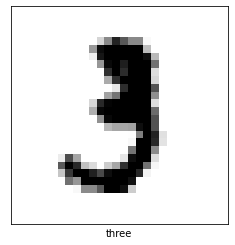

In [6]:
i = 10
plt.imshow(train_images[i].reshape((28,28)), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",  input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [8]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1364 - accuracy: 0.9592 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0368 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0310 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0325 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0349 -

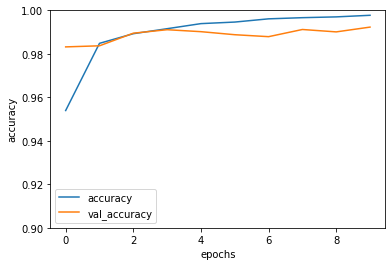

In [53]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.9, 1)
plt.legend()

plt.show()